# Sample usage of Matplotlib and other Python libraries to visualize data

The advantage to this is:

- Use coding
- Easily downloadable
- Can be embedded as HTML

## Connect notebook to project

Here we use a local data set. Using an API to retrieve a Cloud stored version may be preferred.

In [2]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='19045107-0df3-4b0b-a9a0-ad77c118e1a1', project_access_token='p-3db225d588ed875ceb682437165da69d374abe9f')
pc = project.project_context


## Read the CSV file

In [3]:
import pandas as pd

In [4]:
pageviews_data = pd.read_csv(project.get_file('Chart Fake Data.csv'))

In [5]:
pageviews_data.head()

,Date,Sample Pageviews,Sample Mobile Pageviews
0,2021-01-01,7204,7880
1,2021-02-21,9487,5178
2,2021-03-01,4149,6
3,2021-04-01,7738,9733
4,2021-05-21,8181,6277


In [6]:
print(pageviews_data['Date'])
print(pageviews_data['Sample Pageviews'])
print(pageviews_data['Sample Mobile Pageviews'])

0     2021-01-01
1     2021-02-21
2     2021-03-01
3     2021-04-01
4     2021-05-21
5     2021-06-21
6     2021-07-21
7     2021-08-21
8     2021-09-21
9     2021-10-21
10    2021-11-21
11    2021-12-21
Name: Date, dtype: object
0     7204
1     9487
2     4149
3     7738
4     8181
5     4644
6     9123
7     8484
8     3567
9     5821
10     696
11    5033
Name: Sample Pageviews, dtype: int64
0     7880
1     5178
2        6
3     9733
4     6277
5     1814
6     5063
7      203
8     8540
9     7335
10    1371
11    1275
Name: Sample Mobile Pageviews, dtype: int64


### Reformat the data

In [7]:
pageviews_data['Date'] = pd.to_datetime(pageviews_data['Date'])

## Use a basic matplotlib

In [28]:
import matplotlib.pyplot as plt
import base64
from io import BytesIO

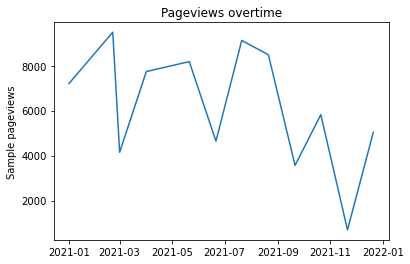

Some html head<img src='data:image/png;charset=utf-8;base64,iVBORw0KGgoAAAANSUhEUgAAAbAAAAEgCAYAAADVKCZpAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8QVMy6AAAACXBIWXMAAAsTAAALEwEAmpwYAAAEVklEQVR4nO3VQQ0AIBDAMMC/58MDH7KkVbDf9swsAKg5vwMA4IWBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKBAZBkYAAkGRgASQYGQJKB

<Figure size 432x288 with 0 Axes>

In [39]:
plt.plot(pageviews_data['Date'], pageviews_data['Sample Pageviews'])
plt.ylabel('Sample pageviews')
plt.title('Pageviews overtime')

plt.show()

# Create a base64 encoding to embed
# This may not be the best solution in a notebook as I think there is trouble generating the file source in Cloud
fig = plt.figure()

tmpfile = BytesIO()
fig.savefig(tmpfile, format='png')
encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')

html = 'Some html head' + '<img src=\'data:image/png;charset=utf-8;base64,{}\'>'.format(encoded) + 'Some more html'

print(html)
with open('test.html','w') as f:
    f.write(html)